### Assignment 7 

#### Performing Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

### 1.Hierarchical Cluster 


In [1]:
# import all required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
crime = pd.read_csv("crime_data.csv")

In [3]:
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


#### Normalized the data


In [4]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [5]:
df_norm = norm_func(crime.iloc[:,1:])
df_norm.describe()

,Murder,Assault,UrbanPop,Rape
count,50.000000,50.000000,50.000000,50.000000
mean,0.420964,0.430685,0.568475,0.360000
std,0.262380,0.285403,0.245335,0.242025
min,0.000000,0.000000,0.000000,0.000000
25%,0.197289,0.219178,0.381356,0.200904
50%,0.388554,0.390411,0.576271,0.330749
75%,0.629518,0.698630,0.775424,0.487726
max,1.000000,1.000000,1.000000,1.000000


#### Building Hierarchy Cluster


In [6]:
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch # for creating dendrogram

In [7]:
z = linkage(df_norm, method="complete",metric="euclidean")

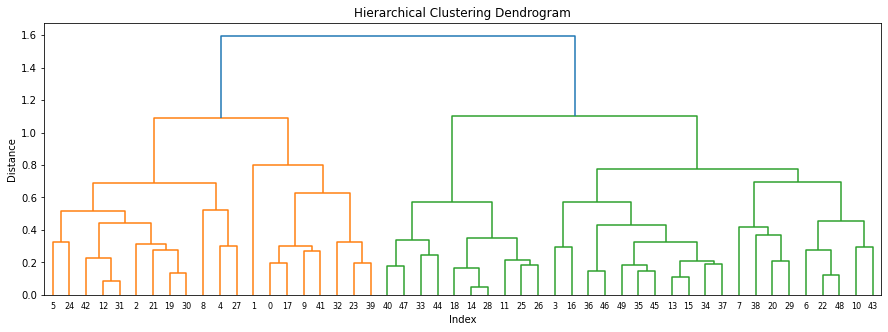

In [8]:
plt.figure(figsize=(15, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
sch.dendrogram(z,
    leaf_rotation=0.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering 
h_complete=AgglomerativeClustering(n_clusters=3,linkage='complete',affinity = "euclidean").fit(df_norm)

In [10]:
h_complete.labels_

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [11]:
cluster_labels=pd.Series(h_complete.labels_)


In [12]:
crime['cluster']=cluster_labels # creating a  new column and assigning it to new column 
crime = crime.iloc[:,[5,0,1,2,3,4]]
crime.head()

,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,0,California,9.0,276,91,40.6


In [13]:
crime.groupby(crime.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.¶


#### As per the above displayed dendogram, we get two clusters. But it really depends on the business case to chose the number of clusters. As i have entered n_clusters as 3 and i chosed linkage='complete' so it has formed 3 cluster and output is obtained for that.¶


### 2. K-Means Cluster

In [14]:
import pandas as pd
import matplotlib.pylab as plt
from sklearn.cluster import	KMeans
from scipy.spatial.distance import cdist 
import numpy as np

In [15]:
X = np.random.uniform(0,1,1000)
Y = np.random.uniform(0,1,1000)
df_xy =pd.DataFrame(columns=["X","Y"])
df_xy.X = X # df_xy["X"] = X
df_xy.Y = Y

<AxesSubplot:xlabel='X', ylabel='Y'>

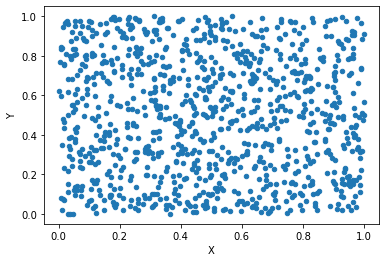

In [16]:
df_xy.plot(x="X",y = "Y",kind="scatter")

In [17]:
model1 = KMeans(n_clusters=5).fit(df_xy)

In [18]:

model1.labels_

array([3, 2, 1, 2, 3, 4, 1, 3, 0, 0, 2, 2, 3, 1, 4, 2, 2, 0, 0, 2, 3, 0,
       4, 3, 0, 2, 2, 1, 1, 0, 4, 1, 0, 2, 3, 2, 3, 0, 1, 4, 0, 4, 1, 0,
       1, 0, 1, 0, 3, 2, 4, 2, 2, 1, 3, 3, 4, 4, 4, 4, 3, 3, 4, 1, 3, 1,
       2, 3, 1, 2, 4, 1, 2, 3, 0, 4, 2, 4, 1, 0, 1, 2, 4, 3, 0, 2, 1, 2,
       3, 3, 4, 4, 2, 3, 1, 1, 0, 0, 3, 1, 0, 2, 4, 0, 1, 1, 4, 4, 1, 3,
       3, 1, 0, 3, 2, 4, 2, 2, 3, 0, 3, 0, 4, 4, 1, 0, 4, 3, 1, 3, 2, 0,
       0, 0, 0, 3, 3, 0, 1, 1, 0, 0, 3, 2, 2, 3, 1, 4, 3, 4, 3, 3, 2, 3,
       4, 1, 0, 3, 0, 3, 3, 3, 3, 0, 3, 0, 4, 0, 2, 3, 0, 3, 0, 4, 4, 3,
       3, 3, 2, 4, 3, 0, 0, 3, 0, 2, 0, 0, 4, 2, 2, 2, 0, 0, 4, 2, 1, 3,
       4, 3, 0, 1, 1, 4, 3, 0, 4, 3, 2, 3, 1, 1, 0, 0, 0, 3, 0, 1, 4, 0,
       0, 0, 2, 3, 2, 1, 3, 1, 2, 1, 4, 2, 1, 1, 3, 4, 2, 3, 2, 1, 3, 3,
       0, 3, 1, 0, 3, 3, 1, 2, 2, 1, 4, 1, 1, 3, 0, 2, 0, 4, 2, 2, 4, 2,
       4, 3, 2, 1, 3, 1, 4, 2, 1, 4, 0, 0, 0, 4, 1, 2, 0, 4, 3, 1, 0, 0,
       4, 4, 1, 0, 4, 4, 1, 1, 3, 2, 3, 0, 2, 2, 2,

In [19]:
model1.cluster_centers_

array([[0.77937358, 0.75285804],
       [0.45290288, 0.53511946],
       [0.2153887 , 0.82572436],
       [0.23213365, 0.2046466 ],
       [0.76948072, 0.21299158]])

<AxesSubplot:xlabel='X', ylabel='Y'>

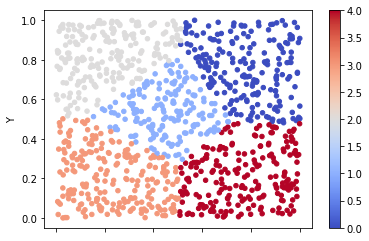

In [20]:

df_xy.plot(x="X",y = "Y",c=model1.labels_,kind="scatter",cmap=plt.cm.coolwarm)

### for convince we'll read the given data with new label

In [21]:
# Kmeans on crime Data set 
crime1 = pd.read_csv("crime_data.csv")

In [22]:
crime1.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [23]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    #x = (i-i.mean())/i.std()
    return (x)

In [24]:
df_norm = norm_func(crime1.iloc[:,1:])


In [25]:
df_norm.head()


,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [26]:
k = list(range(2,15))


In [27]:
k

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

### Building kmeans cluster


In [28]:
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(df_norm)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(df_norm.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,df_norm.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))

([<matplotlib.axis.XTick at 0x2442da406d0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

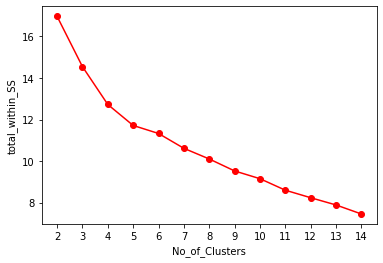

In [30]:

# Scree plot 
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [31]:
# Selecting 5 clusters from the above scree plot which is the optimum number of clusters 
model=KMeans(n_clusters=5) 
model.fit(df_norm)

KMeans(n_clusters=5)

In [32]:
model.labels_ # getting the labels of clusters assigned to each row


array([0, 3, 3, 2, 3, 3, 1, 2, 3, 0, 1, 4, 3, 2, 4, 2, 2, 0, 4, 3, 1, 3,
       1, 0, 2, 4, 1, 3, 4, 1, 3, 3, 0, 4, 2, 2, 2, 1, 1, 0, 4, 0, 3, 1,
       4, 2, 2, 4, 1, 2])

In [33]:
md=pd.Series(model.labels_)  # converting numpy array into pandas series object

In [34]:
crime1['cluster']=md


In [35]:
crime1.head() # creating a  new column and assigning it to new column


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,3
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,3


In [36]:
crime1 = crime1.iloc[:,[5,0,1,2,3,4]]


In [37]:
crime1.iloc[:,1:7].groupby(crime.cluster).mean()


,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,12.165,255.25,68.4,29.165
1,5.715,132.30,70.8,18.100
2,3.180,78.70,49.3,11.630


#### 

#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.¶


#### As observed from the above K-means plotting;with 5 clusters; there is no outliers or overlap has happened.Hence the 5 clusters is good for this model.¶


### 3. DBSCAN

In [38]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [39]:
crime2 = pd.read_csv("crime_data.csv ",index_col=0)

In [40]:
crime.head()

,cluster,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,Alabama,13.2,236,58,21.2
1,0,Alaska,10.0,263,48,44.5
2,0,Arizona,8.1,294,80,31.0
3,1,Arkansas,8.8,190,50,19.5
4,0,California,9.0,276,91,40.6


In [41]:
print(crime2.info())


<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB
None


In [42]:
crime2[['Murder','Assault','UrbanPop','Rape']]


,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9
Georgia,17.4,211,60,25.8


In [43]:
array=crime2.values


In [44]:
array

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

#### Normalize data¶


In [45]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)

In [46]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

#### BuildING DBSCAN cluster¶


In [47]:
dbscan = DBSCAN(eps=0.9, min_samples=6)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=6)

In [48]:
dbscan.labels_


array([-1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0, -1, -1, -1,  0, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0,
        0,  0, -1,  0, -1, -1,  0, -1, -1, -1, -1,  0, -1, -1,  0,  0],
      dtype=int64)

In [49]:
cl=pd.DataFrame(dbscan.labels_,columns=['cluster'])


In [50]:
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,0
7,-1
8,-1
9,-1


In [51]:
pd.concat([crime2,cl],axis=1)


,Murder,Assault,UrbanPop,Rape,cluster
Alabama,13.2,236.0,58.0,21.2,NaN
Alaska,10.0,263.0,48.0,44.5,NaN
Arizona,8.1,294.0,80.0,31.0,NaN
Arkansas,8.8,190.0,50.0,19.5,NaN
California,9.0,276.0,91.0,40.6,NaN
...,...,...,...,...,...
45,NaN,NaN,NaN,NaN,0.0
46,NaN,NaN,NaN,NaN,-1.0
47,NaN,NaN,NaN,NaN,-1.0
48,NaN,NaN,NaN,NaN,0.0


#### We need to do normalization of the data before applying any clustering technique. As few of the fields like Assualt etc carries more weightage when compared to other fields, we need to standardize the fields. If we do not standardize then the larger values may influence the variables having smaller values resulting in calculating the distance wrong.¶


### Compared to all 3 Clustering K-means Clustering is good for this model. Because there is less or no outliers obtained for this dataset.¶
